# Estudo de Caso: Previsão de Chegadas de Turistas (2019)

## 1. Coleta e Carregamento dos Dados 

In [3]:
import pandas as pd

# Carregar o arquivo
chegada_turista_internacionais = pd.read_csv("chegadas_2019.csv", sep=";", engine="python")

# analisando head das colunas do dataframe
chegada_turista_internacionais.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2019,janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Aérea,1,2019,fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Aérea,1,2019,março,3,0
3,África,1,África do Sul,2,Acre,1,Aérea,1,2019,abril,4,0
4,África,1,África do Sul,2,Acre,1,Aérea,1,2019,maio,5,0


In [5]:
# analisando tail das colunas do dataframe
chegada_turista_internacionais.tail()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
49099,Oceania,7,Outros países,998,São Paulo,25,Marítima,3,2019,agosto,8,0
49100,Oceania,7,Outros países,998,São Paulo,25,Marítima,3,2019,setembro,9,0
49101,Oceania,7,Outros países,998,São Paulo,25,Marítima,3,2019,outubro,10,0
49102,Oceania,7,Outros países,998,São Paulo,25,Marítima,3,2019,novembro,11,0
49103,Oceania,7,Outros países,998,São Paulo,25,Marítima,3,2019,dezembro,12,0


## 2.Tratamento dos Dados e Análise Exploratória de Dados (EDA)

In [8]:
# verificando a existencia de valores nulos
chegada_turista_internacionais.isnull().sum()

Continente        0
cod continente    0
País              0
cod pais          0
UF                0
cod uf            0
Via               0
cod via           0
ano               0
Mês               0
cod mes           0
Chegadas          0
dtype: int64

In [10]:
# verificando total de linhas e colunas
chegada_turista_internacionais.shape

(49104, 12)

In [12]:
# Vendo media, desvio padrao, total, minimo e max
chegada_turista_internacionais['Chegadas'].describe()

count     49104.000000
mean        129.381333
std        1561.280727
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max      147555.000000
Name: Chegadas, dtype: float64

In [14]:
import statistics  as sts

# Obtendo mediana
mediana = sts.median(chegada_turista_internacionais['Chegadas'])
mediana

0.0

In [16]:
# total de chegadas por mes
chegadas_por_mes = chegada_turista_internacionais.groupby('Mês')['Chegadas'].sum()
chegadas_por_mes

Mês
abril        497309
agosto       417794
dezembro     652099
fevereiro    816032
janeiro      863301
julho        459827
junho        400237
maio         343094
março        611372
novembro     471671
outubro      413170
setembro     407235
Name: Chegadas, dtype: int64

In [18]:
# analisando chegadas internacionais dentro do estado do ceará
turistas_internacionais_no_ceara = chegada_turista_internacionais[chegada_turista_internacionais['UF'] == 'Ceará']
turistas_internacionais_no_ceara.groupby(['Continente']).size()

Continente
América Central e Caribe       264
América do Norte                72
América do Sul                 288
Continente não especificado     24
Europa                         792
Oceania                         72
África                         264
Ásia                           456
dtype: int64

In [20]:
# total de chegadas por mes no ceara
chegadas_por_mes_no_ceara = turistas_internacionais_no_ceara.groupby('Mês')['Chegadas'].sum()
chegadas_por_mes_no_ceara

Mês
abril         6345
agosto       13219
dezembro     11393
fevereiro    11986
janeiro       8626
julho        12404
junho         8576
maio          4745
março         5540
novembro     10748
outubro       9719
setembro      9619
Name: Chegadas, dtype: int64

In [22]:
# Criar coluna de data

chegada_turista_internacionais['data'] = pd.to_datetime(dict(year=chegada_turista_internacionais['ano'], month=chegada_turista_internacionais['cod mes'], day=1))
chegada_turista_internacionais.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas,data
0,África,1,África do Sul,2,Acre,1,Aérea,1,2019,janeiro,1,0,2019-01-01
1,África,1,África do Sul,2,Acre,1,Aérea,1,2019,fevereiro,2,0,2019-02-01
2,África,1,África do Sul,2,Acre,1,Aérea,1,2019,março,3,0,2019-03-01
3,África,1,África do Sul,2,Acre,1,Aérea,1,2019,abril,4,0,2019-04-01
4,África,1,África do Sul,2,Acre,1,Aérea,1,2019,maio,5,0,2019-05-01


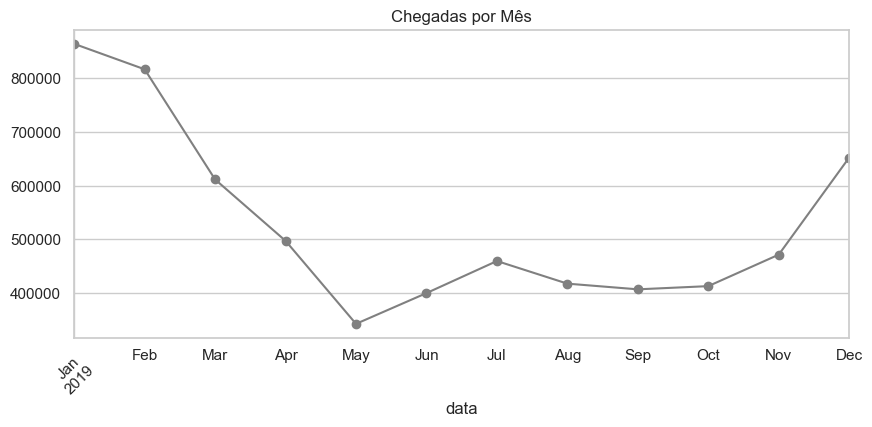

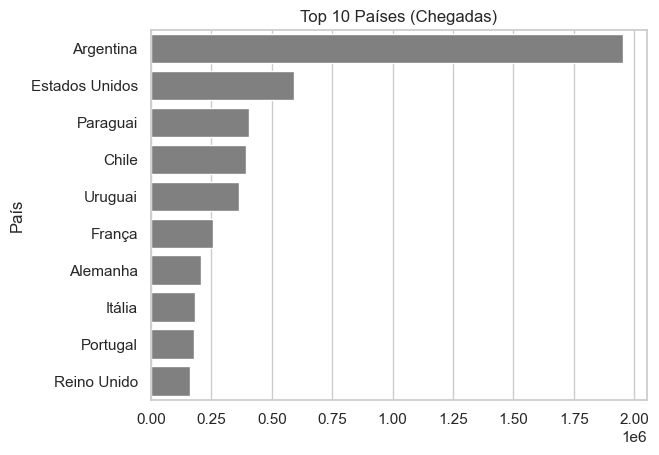

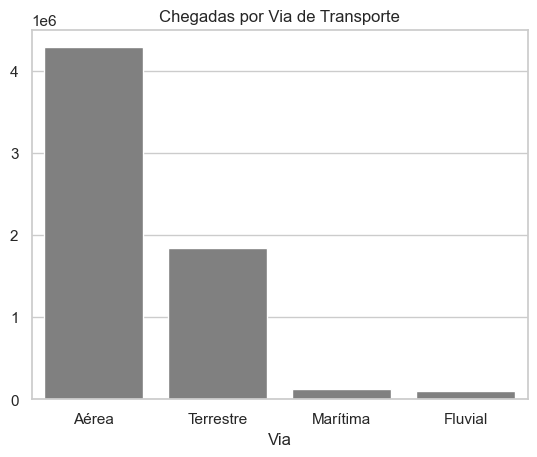

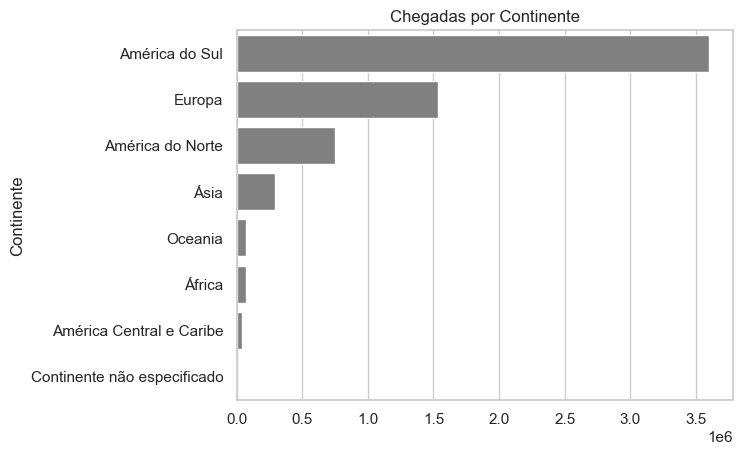

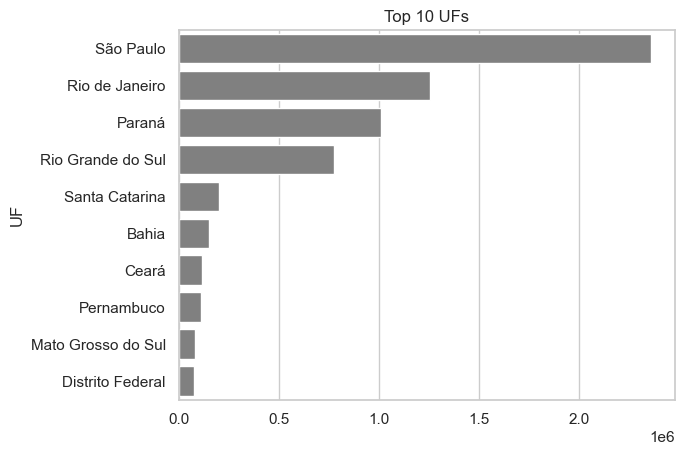

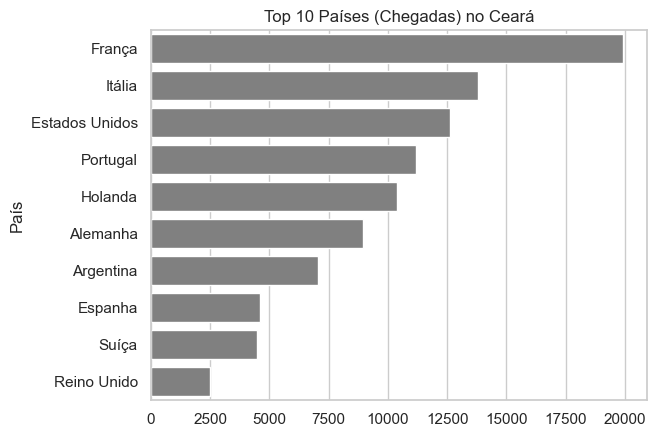

Text(0.5, 1.0, 'Boxplot Chegadas Internacionais')

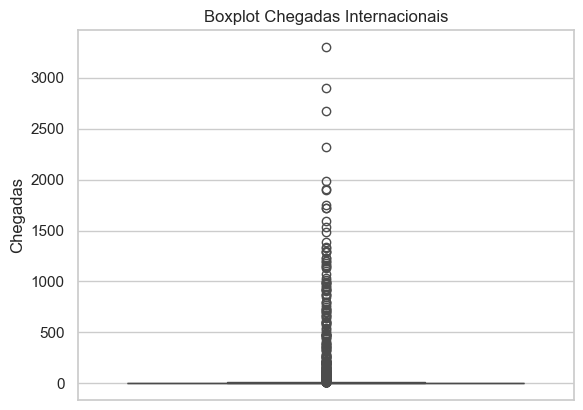

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as srn

sns.set(style="whitegrid")

# 1. Chegadas por mês
chegadas_mes = chegada_turista_internacionais.groupby('data')['Chegadas'].sum()
chegadas_mes.plot(marker='o', figsize=(10,4), title="Chegadas por Mês", color = 'gray')
plt.xticks(rotation=45)
plt.show()

# 2. Top 10 países
top_paises = chegada_turista_internacionais.groupby('País')['Chegadas'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_paises.values, y=top_paises.index, color = 'gray')
plt.title("Top 10 Países (Chegadas)")
plt.show()

# 3. Chegadas por via
via = chegada_turista_internacionais.groupby('Via')['Chegadas'].sum().sort_values(ascending=False)
sns.barplot(x=via.index, y=via.values, color = 'gray')
plt.title("Chegadas por Via de Transporte")
plt.show()

# 2. Chegadas por Continente
top_continentes = chegada_turista_internacionais.groupby('Continente')['Chegadas'].sum().sort_values(ascending=False)
sns.barplot(x=top_continentes.values, y=top_continentes.index, color = 'gray')
plt.title("Chegadas por Continente")
plt.show()

# 4. Chegadas por UF
ufs = chegada_turista_internacionais.groupby('UF')['Chegadas'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ufs.values, y=ufs.index, color = 'gray')
plt.title("Top 10 UFs")
plt.show()

# 5. Chegadas no CEARA
pais_to_ceara = turistas_internacionais_no_ceara.groupby('País')['Chegadas'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=pais_to_ceara.values, y=pais_to_ceara.index, color = 'gray')
plt.title("Top 10 Países (Chegadas) no Ceará")
plt.show()

# 6. Boxplot das chegadas
srn.boxplot(turistas_internacionais_no_ceara['Chegadas']).set_title('Chegadas')
plt.title("Boxplot Chegadas Internacionais")

In [26]:
# Remove a coluna 
chegada_turista_internacionais = chegada_turista_internacionais.drop(columns=['Continente'])
chegada_turista_internacionais = chegada_turista_internacionais.drop(columns=['País'])
chegada_turista_internacionais = chegada_turista_internacionais.drop(columns=['UF'])
chegada_turista_internacionais = chegada_turista_internacionais.drop(columns=['Via'])
chegada_turista_internacionais = chegada_turista_internacionais.drop(columns=['Mês'])

# Renomeia a coluna 
chegada_turista_internacionais = chegada_turista_internacionais.rename(columns={'cod continente': 'Continente'})
chegada_turista_internacionais = chegada_turista_internacionais.rename(columns={'cod pais': 'País'})
chegada_turista_internacionais = chegada_turista_internacionais.rename(columns={'cod uf': 'UF'})
chegada_turista_internacionais = chegada_turista_internacionais.rename(columns={'ano': 'Ano'})
chegada_turista_internacionais = chegada_turista_internacionais.rename(columns={'cod via': 'Via'})
chegada_turista_internacionais = chegada_turista_internacionais.rename(columns={'cod mes': 'Mês'})
chegada_turista_internacionais

,Continente,País,UF,Via,Ano,Mês,Chegadas,data
0,1,2,1,1,2019,1,0,2019-01-01
1,1,2,1,1,2019,2,0,2019-02-01
2,1,2,1,1,2019,3,0,2019-03-01
3,1,2,1,1,2019,4,0,2019-04-01
4,1,2,1,1,2019,5,0,2019-05-01
...,...,...,...,...,...,...,...,...
49099,7,998,25,3,2019,8,0,2019-08-01
49100,7,998,25,3,2019,9,0,2019-09-01
49101,7,998,25,3,2019,10,0,2019-10-01
49102,7,998,25,3,2019,11,0,2019-11-01


## 3. Previsão com Rede Neural (MLP)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
import numpy as np

# Selecionar colunas de entrada
chegada_turista_internacionais_model = chegada_turista_internacionais[['País', 'UF', 'Via', 'Mês', 'Chegadas']].copy()

# # One-hot encoding para variáveis categóricas
# chegada_turista_internacionais_model = pd.get_dummies(chegada_turista_internacionais_model, columns=['País', 'UF', 'Via'])

# Separar entrada e saída
X = chegada_turista_internacionais_model.drop(columns='Chegadas')
y = chegada_turista_internacionais_model['Chegadas']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar o Modelo MLP para regressão
model = Sequential()
model.add(Input(shape=(X_treinamento.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_treinamento, y_treinamento, epochs=100, batch_size=16, validation_split=0.2)


Epoch 1/100
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3521086.2500 - mae: 197.8463 - val_loss: 1540504.6250 - val_mae: 208.6007
Epoch 2/100
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2868434.2500 - mae: 256.2306 - val_loss: 1528377.7500 - val_mae: 179.9854
Epoch 3/100
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3179226.7500 - mae: 233.9587 - val_loss: 1511392.3750 - val_mae: 193.2277
Epoch 4/100
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2553157.0000 - mae: 205.6759 - val_loss: 1503740.8750 - val_mae: 211.3366
Epoch 5/100
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1578643.7500 - mae: 207.4866 - val_loss: 1559310.8750 - val_mae: 269.2473
Epoch 6/100
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1995651.7500 - mae: 223.9118 - val_loss: 1502378.8750 - val_mae: 215.0740
Epoch 7/100
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2198608.0000 - mae: 213.8671 - val_loss: 1498834.2500 - val_mae: 206.8439
Epoch 8/100
1965/1965 ━━━━━━━━━━━━━━━━━━━

## 4. Avaliação do Modelo

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Previsões
y_previsoes = model.predict(X_teste).flatten()

# Métricas
rmse = np.sqrt(mean_squared_error(y_teste, y_previsoes))
r2 = r2_score(y_teste, y_previsoes)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 1610.73
R²: 0.05


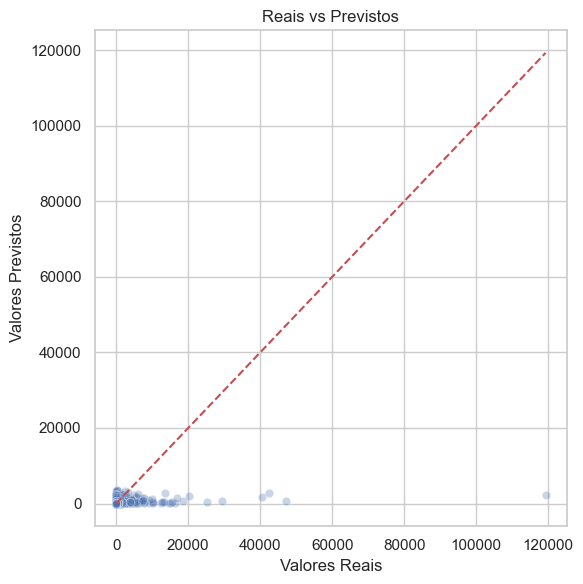

In [33]:
# Gráfico de dispersão: reais vs preditos
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_teste, y=y_previsoes, alpha=0.3)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'r--') 
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Reais vs Previstos")
plt.tight_layout()
plt.show()

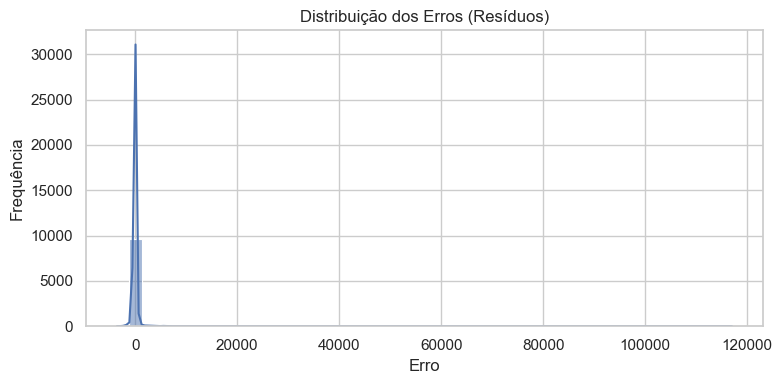

In [35]:
# Erros (resíduos)
erros = y_teste - y_previsoes

# Histograma dos erros
plt.figure(figsize=(8, 4))
sns.histplot(erros, bins=50, kde=True)
plt.title("Distribuição dos Erros (Resíduos)")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()